# Lab 13 Taylor Polynomials

How to find the Taylor Polynomials using Sage:

First, define your function

In [51]:
f(x) = 1/(1-x)

### Step 1: Take lots of derivatives

Then several derivatives of your function.  You can do it "by hand" like this

In [52]:
f1 = f.derivative(x)
show(f1) #Delete or comment out these "show" commands if you don't need to see them.
f2 = f1.derivative(x)
show(f2)

x |--> (x - 1)^(-2)

x |--> -2/(x - 1)^3

Or you can use Python list comprehension to do a bunch of derivatives all at once.  The "7" below means that you will find the 0-th derivative (the original function) through the 6-th derivative.

In [53]:
f_ders = [f.derivative(x,i) for i in range(7)]
show(f_ders)

[x |--> -1/(x - 1),
 x |--> (x - 1)^(-2),
 x |--> -2/(x - 1)^3,
 x |--> 6/(x - 1)^4,
 x |--> -24/(x - 1)^5,
 x |--> 120/(x - 1)^6,
 x |--> -720/(x - 1)^7]

### Step 2: Evaluate the derivatives at the center point $x=a$

Then we need to plug in our point $a$, which will be the point that we center our Taylor Polynomials.  Again, we could do this by hand (like a crazy person):

In [54]:
a = 0
show(f(a))
f1a = f1(a) #Make sure that you are running this cell after the cell where f1 is defined.
show(f1a)
f2a = f2(a)
show(f2a)

1

1

2

Or we could use Python list comprehension again

In [55]:
a = 0
f_ders_a = [g(a) for g in f_ders] #Here g is each function in f_ders, which is a list of functions
show(f_ders_a)

[1, 1, 2, 6, 24, 120, 720]

Now, you might be thinking to yourself, "Dr. Johnson, couldn't we combine the first and second steps using Python list comprehension?"  And I would reply, "Yes! Great idea!  Work smarter, not harder."

In [56]:
a = 0
f_ders_a = [f.derivative(x,i)(a) for i in range(7)]
show(f_ders_a)

[1, 1, 2, 6, 24, 120, 720]

### Step 3: Divide by factorials

Next, we need to divide each evaluated derivative by a factorial.  This will give us the coefficient for each power of $x$ in the Taylor polynomial.  First we'll do it the slow way, but if you still prefer this way, then Dr. Johnson has concerns for your sanity. :-)

In [57]:
c0 = f(a)/factorial(0)
show(c0)
c1 = f1a/factorial(1)
show(c1)
c2 = f2a/factorial(2)
show(c2)

1

1

1

Or we could use list comprehension again

In [58]:
C = [f_ders_a[i]/factorial(i) for i in range(7)] #Remember, you might need to change the 7 for your examples
show(C)

[1, 1, 1, 1, 1, 1, 1]

Now, you might be thinking to yourself, "Dr. Johnson, couldn't we combine the first, second, and third steps using Python list comprehension?" And I would reply, "Yes! Great idea! Work smarter, not harder."

In [59]:
C = [f.derivative(x,i)(a)/factorial(i) for i in range(7)]
show(C)

[1, 1, 1, 1, 1, 1, 1]

### Step 4: Multiply the coefficients by the powers of $x$

Finally, we multiply each coefficient with it's respective power of $x$ to get our Taylor Polynomial.  We could do this the slow way:

In [60]:
P_2(x) = c0 + c1*(x-a) + c2*(x-a)^2
show(P_2(x))

x^2 + x + 1

Or we could use Python list comprehension again and the sum function

In [61]:
P_6(x) = sum([C[i]*(x-a)^i for i in range(7)]) #Again, you might need to change this 7 for your examples
show(P_6(x))

x^6 + x^5 + x^4 + x^3 + x^2 + x + 1

Now, you might be thinking to yourself, "Dr. Johnson, couldn't we combine the first, second, third, and fourth steps using Python list comprehension and the sum function?" And I would reply, "Yes! Great idea! Work smarter, not harder."

In [62]:
P_6(x) = sum([f.derivative(x,i)(a)/factorial(i)*(x-a)^i for i in range(7)])
show(P_6(x))

x^6 + x^5 + x^4 + x^3 + x^2 + x + 1

That "7" above could be defined as "n," and you could define `n=7` in an earlier cell.  That would be even better.

### Step 5: Plot the function and its Taylor Polynomial

At this point, you should still have your center `a` defined somewhere above.  Also define the radius `r` that you want to view around that point `a`.  You probably want `r` to be a little bigger than the radius of convergence, but not too much bigger.

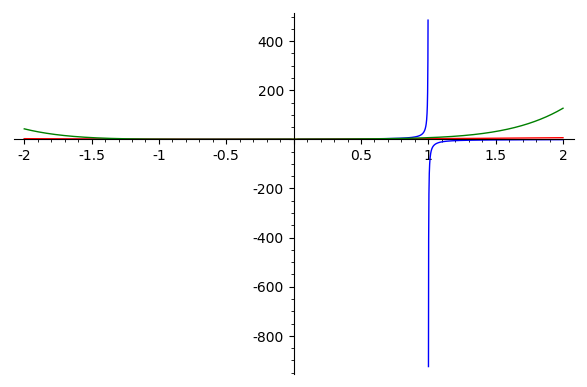

In [63]:
r = 2
Plot1 = f.plot(x, a-r, a+r, detect_poles = True)
Plot2 = P_2.plot(x, a-r, a+r, color = "red")
Plot3 = P_6.plot(x, a-r, a+r, color = "green")
Plot = Plot1 + Plot2 + Plot3
Plot.show()

If your function has asymptotes like in my example, then you can tell Sage to use a ymin and ymax.  But what ymin and ymax should you use?  You could find the min and max of your Taylor polynomial on that region.  Then go a little further than that.

In [64]:
yma, x_at_yma = P_6.find_local_maximum(a-r,a+r)
ymi, x_at_ymi = P_6.find_local_minimum(a-r, a+r)
yma = max(2*yma, yma/2, yma+10)
ymi = min(2*ymi, ymi/2, ymi-10)

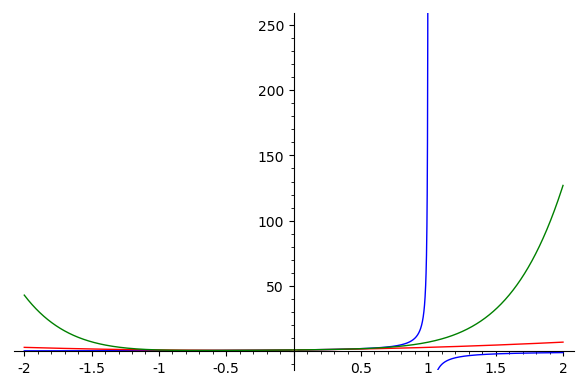

In [65]:
Plot.show(ymin = ymi, ymax = yma)

# Exercises

1. Find the Taylor Series polynomial for $f(x)=x^4 e^{3x^2}$ about $a=1$.  Plot $P_3 (x)$, $P_7 (x)$ and the original function on the interval $[0,2]$.

2. Using your answer from \#1, find an approximation to $f(0)$ using $P_3$ and $P_7$.  Is this a good approximation? Explain why or why not.

3. Find the 6th degree Taylor Series for $g(x)=e^x  \arctan⁡(x)$  about $x=0$.  Plot $P_6 (x)$ and the original function on the interval $[-1.5,1.5]$.

4. Using your answer from \#3, find $g\left(\frac{3}{2}\right)$.  Is this a good approximation? Explain why or why not.

5. Use Taylor Series to find an approximation to $\int_{-1}^1\frac{\sin⁡(x)}{x}\ dx$.  Below are the steps you will need to perform:

    1. Find the Taylor Series for $\frac{sin⁡(x)}{x}$ centered at $x=0$.
    
    2. Find the Taylor Series for $\int\frac{\sin⁡(x)}{x}\ dx$.
    
    3. Use \#5B to evaluate the Taylor Series at $x=0$ and $x=1$ and subtract them.
    
    4. Determine the number of terms you will need to get within 0.001.  Use the Remainder Theorem from the textbook.
    
6. Find an approximation to $\int_0^1e^{-x^2}\ dx$.  You will need to determine the appropriate number of terms to be within 0.005 from the Remainder Theorem from the textbook.  Also, use $a=0$ as your center.

# Problem 1

In [66]:
f(x) = x^4*e^(3*x^2)
a=1
P_3(x) = sum([f.derivative(x,i)(a)/factorial(i)*(x-a)^i for i in range(4)])
P_7(x) = sum([f.derivative(x,i)(a)/factorial(i)*(x-a)^i for i in range(8)])
show(P_7(x))

118683/35*(x - 1)^7*e^3 + 4047/2*(x - 1)^6*e^3 + 5319/5*(x - 1)^5*e^3 + 959/2*(x - 1)^4*e^3 + 178*(x - 1)^3*e^3 + 51*(x - 1)^2*e^3 + 10*(x - 1)*e^3 + e^3

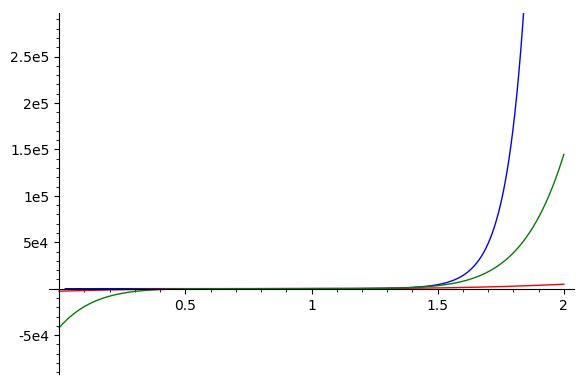

In [67]:
r = 1
Plot1 = f.plot(x, a-r, a+r, detect_poles = True)
Plot2 = P_3.plot(x, a-r, a+r, color = "red")
Plot3 = P_7.plot(x, a-r, a+r, color = "green")
Plot = Plot1 + Plot2 + Plot3

yma, x_at_yma = P_7.find_local_maximum(a-r,a+r)
ymi, x_at_ymi = P_7.find_local_minimum(a-r, a+r)
yma = max(2*yma, yma/2, yma+10)
ymi = min(2*ymi, ymi/2, ymi-10)
Plot.show(ymin = ymi, ymax = yma)

# Problem 2

In [80]:
show(f(0).n())
show(P_3(0).n())
show(P_7(0).n())
show(f.taylor(x,1,7)(0).n())
show(f.taylor(x,1,40)(0).n())

0.000000000000000

-2731.63302155352

-41933.4362432642

-41933.4362432642

0.627327736783016

Neither of the Taylor polynomials are good approximations of the function at 3/2, but $P_7(x)$ is at least in the right ballwpark.

# Problem 3

# Problem 5

In [111]:
f(x) = sin(x)/x
a=1/10

for n in range(2, 25):
    T = sum(f.derivative(x,i)(a)/factorial(i)*(x-a)^i for i in range(n+1))
    #show(T5)
    Tint = T.integrate(x)
    show(Tint(1).n() - Tint(0).n())

0.944580200416507

0.945126216542576

0.946106870605718

0.946096339824180

0.946082835330249

0.946082953884700

0.946083071638798

0.946083072570121

0.946083039042508

0.946083068844830

0.946079254147565

0.946075439450299

0.946044921872174

0.947265624997174

0.953124999997174

0.874999999997174

0.999999999997174

-2.82589229794183e-12

-64.0000000000028

-2.82590617572964e-12

-4096.00000000000

65536.0000000000

-2.82590617572964e-12

In [114]:
f(x) = sin(x)/x
a=1/10

b = 0
for n in range(2, 25):
    T = f.taylor(x,a,n)
    #show(T5)
    Tint = T.integrate(x)
    show(Tint(1).n() - Tint(0).n() - b)
    b = Tint(1).n() - Tint(0).n()

0.944580200416507

0.000546016126069304

0.000980654063141628

-0.0000105307815374545

-0.0000135044939310047

1.18554450589947e-7

1.17754098361011e-7

9.31322574615479e-10

-3.35276127971795e-8

2.98023224987176e-8

-3.81469726573602e-6

-3.81469726551398e-6

-0.0000305175781250000

0.00122070312499989

0.00585937500000000

-0.0781249999999999

0.125000000000000

-1.00000000000000

-64.0000000000000

64.0000000000000

-4096.00000000000

69632.0000000000

-65536.0000000000